In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

In [ ]:
model.evaluate(x_test, y_test)

6


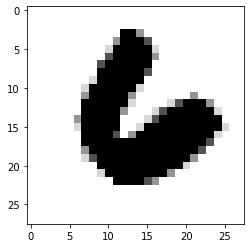

In [ ]:
import matplotlib.pyplot as plt
image_index = 7843
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
print(x_train[image_index])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]


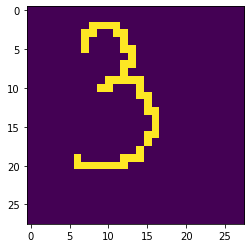

In [ ]:
from PIL import Image
import numpy as np
img= Image.open("/content/drive/MyDrive/Colab Notebooks/hu-bby261-2021-final/rakamlar/3.png").convert("L")
img= np.resize(img, (28,28,1))
imgBinary = np.array(img)
plt.imshow(imgBinary.reshape(28, 28))

tahminDizi = model.predict(imgBinary.reshape(1,28,28,1))
tahminRakam = np.argmax(model.predict(imgBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminDizi)
print(tahminRakam)